# Capstone Project : Used Cars Price Prediction

    1. get the data

    2.discovery in visualiztion
    > graph
    > perform distribution(histogram,boxplot)
    > perform outlier
    > perform correlation matrix
    
    3. preprocessing
    > handle missing values
    > prform feature scaling
    > perform one hot encoding  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('Updated 14-3-2021.csv')
cars.head(2)

,Unnamed: 0,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,type,paint_color,description,state,lat,long,posting_date,age
0,0,sacramento,339998,NaN,LAMBORGHINI AVENTADOR,NaN,4.0,gas,5915.0,clean,...,ZHWUG4ZD2JLA06953,NaN,coupe,NaN,2018 Lamborghini Aventador LP 740 4 S AWD 2dr ...,ca,38.574553,-121.257580,2020-12-02T10:36:44-0800,3.0
1,1,worcester / central MA,325000,ferrari,488 spider,NaN,4.0,gas,684.0,clean,...,ZFF80AMA4K0242130,rwd,convertible,NaN,HighOctane Classics address: 143 Washington...,ma,42.209970,-71.807702,2020-11-24T09:04:51-0500,2.0


In [3]:
cars['title_status'].value_counts(normalize=True)

clean         0.965297
rebuilt       0.020054
salvage       0.007680
lien          0.006851
missing       0.000071
parts only    0.000047
Name: title_status, dtype: float64

In [4]:
# We want to consider that car which is in good shape
cars=cars[cars['title_status']=='clean']

In [5]:
# dropping the first irrelevant column from the dataset
cars.drop(columns=['Unnamed: 0','title_status'],inplace=True)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81444 entries, 0 to 84654
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        81444 non-null  object 
 1   price         81444 non-null  int64  
 2   manufacturer  80534 non-null  object 
 3   model         81328 non-null  object 
 4   condition     43237 non-null  object 
 5   cylinders     81444 non-null  float64
 6   fuel          80729 non-null  object 
 7   odometer      81444 non-null  float64
 8   transmission  80959 non-null  object 
 9   VIN           68411 non-null  object 
 10  drive         62196 non-null  object 
 11  type          69830 non-null  object 
 12  paint_color   60020 non-null  object 
 13  description   81442 non-null  object 
 14  state         81444 non-null  object 
 15  lat           80867 non-null  float64
 16  long          80867 non-null  float64
 17  posting_date  81444 non-null  object 
 18  age           81444 non-nu

In [9]:
cars

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date,age
0,sacramento,339998,NaN,LAMBORGHINI AVENTADOR,NaN,4.0,gas,5915.0,automatic,ZHWUG4ZD2JLA06953,NaN,coupe,NaN,2018 Lamborghini Aventador LP 740 4 S AWD 2dr ...,ca,38.574553,-121.257580,2020-12-02T10:36:44-0800,3.0
1,worcester / central MA,325000,ferrari,488 spider,NaN,4.0,gas,684.0,automatic,ZFF80AMA4K0242130,rwd,convertible,NaN,HighOctane Classics address: 143 Washington...,ma,42.209970,-71.807702,2020-11-24T09:04:51-0500,2.0
2,san antonio,319000,ferrari,488 spider convertible,NaN,4.0,NaN,1233.0,automatic,ZFF80AMA2K0238691,rwd,convertible,custom,2019 Ferrari 488 Spider Convertible Cal...,tx,29.529409,-98.496166,2020-11-22T09:45:19-0600,2.0
11,san diego,285888,ferrari,488 spider,NaN,8.0,gas,2862.0,automatic,ZFF80AMA8H0220253,rwd,convertible,red,🚗2017 Ferrari 488 Spider Convertible🚗Exterior ...,ca,32.991085,-117.197375,2020-12-02T11:18:21-0800,4.0
12,orange county,279888,ferrari,488 spider,like new,8.0,gas,5900.0,automatic,NaN,NaN,NaN,black,Only 5900 Miles On This Beautiful 1 Owner 488 ...,ca,33.680100,-117.908500,2020-11-30T07:25:59-0800,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84650,eugene,103,nissan,sentra s cvt,NaN,4.0,gas,73817.0,automatic,3N1AB7AP3JY269333,fwd,sedan,NaN,2018 Nissan Sentra S CVT Lithia Toyota of Spri...,or,44.045388,-123.013980,2020-12-02T09:27:30-0800,3.0
84651,ocala,103,hyundai,accent se,excellent,4.0,gas,67125.0,automatic,KMHCT4AE3HU187420,NaN,sedan,NaN,$103/mo - 2017 Hyundai *Accent* *SE* - 100 App...,fl,28.329017,-81.404223,2020-11-24T10:01:03-0500,4.0
84652,eugene,103,nissan,versa,NaN,4.0,gas,61238.0,automatic,3N1CN7AP6HL822998,fwd,sedan,NaN,Lithia Nissan Of Eugene STOCK #: N8229...,or,44.066500,-123.080966,2020-11-24T07:19:07-0800,4.0
84653,lakeland,103,hyundai,accent se,excellent,4.0,gas,67125.0,automatic,KMHCT4AE3HU187420,NaN,sedan,NaN,$103/mo - 2017 Hyundai Accent SE - 100 Approve...,fl,28.329017,-81.404223,2020-11-25T11:05:17-0500,4.0


In [90]:
cars.reset_index(drop=True,inplace=True)

In [13]:
cars.describe()

,price,cylinders,odometer,lat,long,age
count,81444.000000,81444.000000,8.144400e+04,80867.000000,80867.000000,81444.000000
mean,28505.666163,5.063479,3.622866e+04,38.856990,-97.198601,2.980355
std,15871.856580,1.502450,5.005903e+04,6.478758,19.068297,1.029390
min,103.000000,3.000000,0.000000e+00,8.872342,-159.713745,0.000000
25%,17995.000000,4.000000,1.586600e+04,34.245549,-116.742300,2.000000
50%,26990.000000,4.000000,2.919250e+04,39.337094,-91.755323,3.000000
75%,35995.000000,6.000000,4.652075e+04,42.885063,-82.321830,4.000000
max,339998.000000,12.000000,6.000000e+06,64.993698,-67.840490,4.000000


In [14]:
cars.shape

(81444, 19)

In [15]:
# Percent of nulls in the data
pd.DataFrame({'Columns':cars.columns,'Percent Nulls':(cars.isnull().sum()/len(cars) * 100).values})

,Columns,Percent Nulls
0,region,0.000000
1,price,0.000000
2,manufacturer,1.117332
3,model,0.142429
4,condition,46.911989
5,cylinders,0.000000
6,fuel,0.877904
7,odometer,0.000000
8,transmission,0.595501
9,VIN,16.002407


# Splitting the data into categorical and numerical

### splitting dependent and independent features

In [39]:
y=cars[['price']]
X=cars.drop(columns=['price'])

### Splitting the X,y into train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [18]:
# split train set into num and cat (fit_transform())
X_train_int = X_train.select_dtypes(include=np.number)
X_train_str = X_train.select_dtypes(exclude=np.number)

####################################################

#split test set into num and cat (transform())
X_test_int=X_test.select_dtypes(include=np.number)
X_test_str=X_test.select_dtypes(exclude=np.number)

In [42]:
# Imputing nulls in Numerical columns by Iterative Imputer
from sklearn.experimental import enable_iterative_imputer #(for importing iterative imputer)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [44]:
# Iterative Imputer for numerical column
# (to remove null values using the linear regression)


from sklearn.impute import IterativeImputer

ii = IterativeImputer(estimator=LinearRegression(),random_state=8)

# fit_transform()
iter_X_train = pd.DataFrame(ii.fit_transform(X_train_int),columns=X_train_int.columns)

# transform()
iter_X_test = pd.DataFrame(ii.transform(X_test_int),columns=X_test_int.columns)

In [45]:
# sanity check 
iter_X_train.isnull().sum()

cylinders    0
odometer     0
lat          0
long         0
age          0
dtype: int64

In [46]:
# sanity check 
iter_X_test.isnull().sum()

cylinders    0
odometer     0
lat          0
long         0
age          0
dtype: int64

In [47]:
# Imputing the null values in Categorical train data

misscol_X_train_str=list(np.where(X_train_str.isnull().sum())[0])
for i in misscol_X_train_str:
    X_train_str.iloc[:,i]=X_train_str.iloc[:,i].fillna(X_train_str.iloc[:,i].mode()[0])

In [48]:
# sanity check
X_train_str.isnull().sum()

region          0
manufacturer    0
model           0
condition       0
fuel            0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
description     0
state           0
posting_date    0
dtype: int64

In [49]:
# Imputing nulls in categorical test columns 
misscol_X_test_str=list(np.where(X_test_str.isnull().sum())[0])
for i in misscol_X_test_str:
    X_test_str.iloc[:,i]=X_test_str.iloc[:,i].fillna(X_test_str.iloc[:,i].mode()[0])

In [50]:
# sanity check
X_test_str.isnull().sum()

region          0
manufacturer    0
model           0
condition       0
fuel            0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
description     0
state           0
posting_date    0
dtype: int64

In [51]:
#########################################
X_train_int.head()

,cylinders,odometer,lat,long,age
56694,6.0,58402.0,38.549500,-90.381100,4.0
74859,4.0,73920.0,46.574457,-120.490540,3.0
25063,8.0,1506.0,34.000000,-81.030000,3.0
49911,6.0,34684.0,38.821080,-104.823110,2.0
44418,6.0,56902.0,28.792413,-81.231302,4.0


In [52]:
X_test_int.head()

,cylinders,odometer,lat,long,age
38259,4.0,11593.0,29.760000,-95.380000,3.0
15190,4.0,77561.0,28.015670,-82.459780,3.0
68103,4.0,12987.0,40.544000,-84.394400,4.0
12782,6.0,70935.0,47.812470,-122.321640,4.0
39188,4.0,90215.0,43.495074,-111.983471,4.0


In [53]:
X_train_str.head()

,region,manufacturer,model,condition,fuel,transmission,VIN,drive,type,paint_color,description,state,posting_date
56694,"st louis, MO",chrysler,300 s,excellent,gas,automatic,2C3CCABG6HH553736,rwd,sedan,black,2017 CHRYSLER 300 S You will not find a cleane...,il,2020-12-02T15:00:00-0600
74859,yakima,chevrolet,malibu,good,gas,automatic,1G1ZD5ST9JF198066,fwd,sedan,white,2018 Chevrolet Chevy Malibu LT Sedan 4D Of...,wa,2020-11-20T10:38:55-0800
25063,columbia,chevrolet,silverado 1500 crew,good,gas,automatic,3GCPCREC6JG623276,4wd,pickup,black,Carvana is the safer way to buy a car During t...,sc,2020-11-07T13:24:05-0500
49911,colorado springs,nissan,frontier crew cab sv,good,gas,other,1N6AD0ER5KN722485,fwd,pickup,blue,Carvana is the safer way to buy a car During t...,co,2020-11-29T07:47:45-0700
44418,orlando,ford,explorer,good,gas,automatic,1C4HJWDG6HL702229,fwd,SUV,white,➥ You can immediately confirm availability of...,fl,2020-11-27T11:41:33-0500


In [54]:
X_test_str.head()

,region,manufacturer,model,condition,fuel,transmission,VIN,drive,type,paint_color,description,state,posting_date
38259,houston,buick,regal tourx essence wagon,good,gas,other,W04GV8SX1J1134367,4wd,wagon,white,Carvana is the safer way to buy a car During t...,tx,2020-12-01T11:40:10-0600
15190,orlando,chevrolet,suburban,good,gas,automatic,1GNSCHKC6JR162791,fwd,SUV,white,2018 Chevrolet Chevy Suburban LT 1500 4x2 4dr ...,fl,2020-12-02T10:07:47-0500
68103,dayton / springfield,ford,fusion se,good,gas,automatic,1C4HJWDG6HL702229,4wd,sedan,white,Call 888-367-3856 Be sure to ask for Maxwell G...,oh,2020-11-05T12:01:10-0500
12782,eugene,ford,f-150 lariat,good,gas,automatic,1FTFW1EGXHFA49039,4wd,truck,white,our number one priority is the health and safe...,or,2020-12-02T20:00:02-0800
39188,east idaho,ford,f150 xlt,excellent,gas,automatic,1FTEW1EG4HKD64101,4wd,truck,white,**Back Up Camera/Remote Start/Great Deal**2017...,id,2020-11-11T10:53:53-0700


In [55]:
#concating the X_train (int+str)
X_train_joined=pd.concat([X_train_int,X_train_str],axis=1)

#concating the X_test (int+str)
X_test_joined=pd.concat([X_test_int,X_test_str],axis=1)


X_train_joined,y_train

X_test_joined,y_test


# EDA

## Getting the idea of the distribution of the data of the Numerical Feature

### Trim Mean

In [56]:
from scipy.stats import trim_mean
for i in X_train_joined.select_dtypes(include=np.number).columns:
    print(i)
    print('Mean',np.mean(X_train_joined[i]),'\n Trim_Mean',trim_mean(X_train_joined[i],0.01))

cylinders
Mean 5.061069756733942 
 Trim_Mean 5.043083332028252
odometer
Mean 36307.08518149029 
 Trim_Mean 34818.08840618295
lat
Mean 38.85319246789506 
 Trim_Mean 38.956336314707215
long
Mean -97.20127156774392 
 Trim_Mean -96.66727459735642
age
Mean 2.981444248330903 
 Trim_Mean 2.997290651966235


### From the above step we got the idea that there are outliers present in the price and odometer columns..we will confirm this by making significant graphs

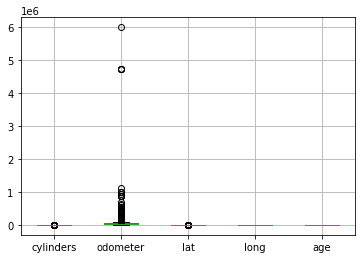

In [57]:
X_train_joined.select_dtypes(include=np.number).boxplot()
plt.show()

In [58]:
# Odometer has some extreme outliers present

## Price

In [59]:
print('Maximum Price:',y_train.price.max())
print('Minimum Price:',y_train.price.min())

Maximum Price: 339998
Minimum Price: 103


In [60]:
y_train.price.value_counts().sort_index()

103       4
116       1
120       1
122       1
125       2
         ..
269888    1
269999    1
272500    1
325000    1
339998    1
Name: price, Length: 8597, dtype: int64

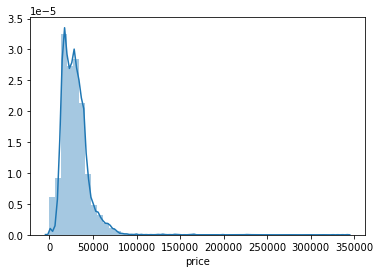

In [61]:
sns.distplot(y_train.price.sort_values()) #Original
plt.show()

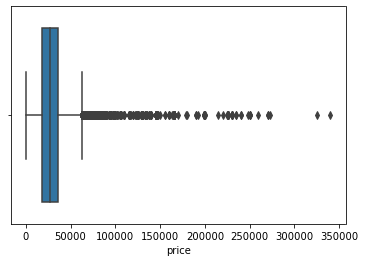

In [62]:
sns.boxplot(y_train.price.sort_values())
plt.show()

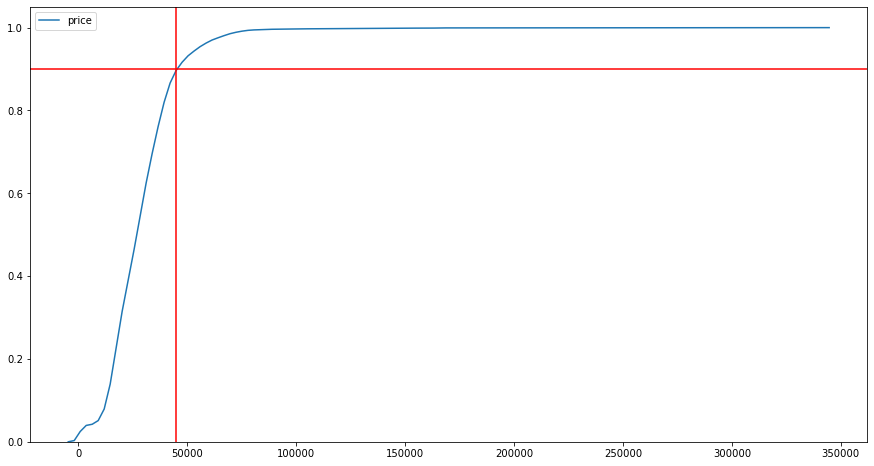

In [63]:
plt.figure(figsize=(15,8))
sns.kdeplot(y_train.price,cumulative=True)
plt.axhline(.9,c='r')
plt.axvline(45000,c='r')
plt.show()

### Here we get a idea that around 90% of the cars are cost less than 45000 $

### Odometer

In [64]:
print('Maximum odo:',X_train_joined.odometer.max())
print('Minimum odo:',X_train_joined.odometer.min())

Maximum odo: 6000000.0
Minimum odo: 0.0


In [65]:
X_train_joined.odometer.value_counts().sort_index()

0.0          103
1.0           92
2.0           25
3.0          124
4.0           52
            ... 
999000.0       1
999999.0       2
1111111.0      1
4728224.0      4
6000000.0      1
Name: odometer, Length: 25261, dtype: int64

In [ ]:
### Their are around 103 cars while are not even driven i.e their odometer reading is 0.0

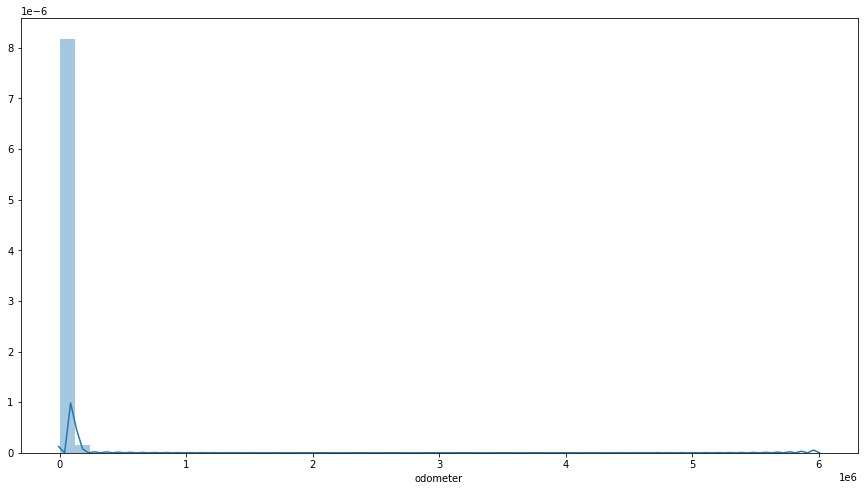

In [66]:
plt.figure(figsize=(15,8))
sns.distplot(X_train_joined.odometer)
plt.show()

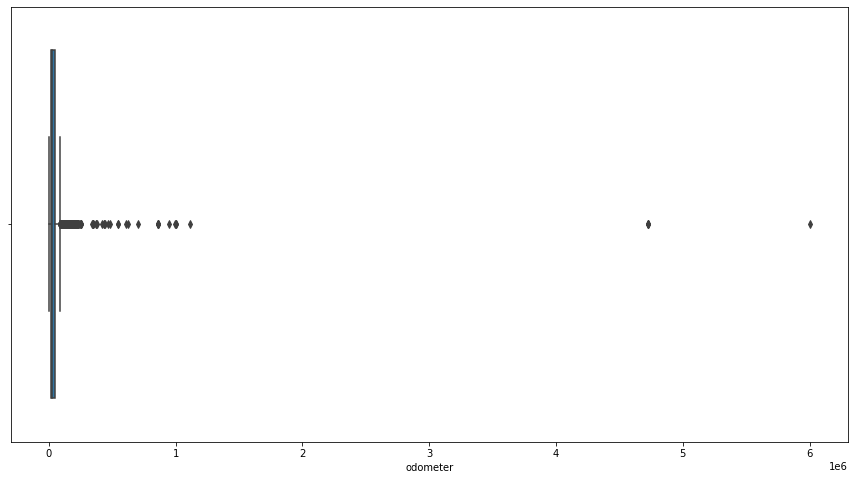

In [67]:
plt.figure(figsize=(15,8))
sns.boxplot(X_train_joined.odometer)
plt.show()

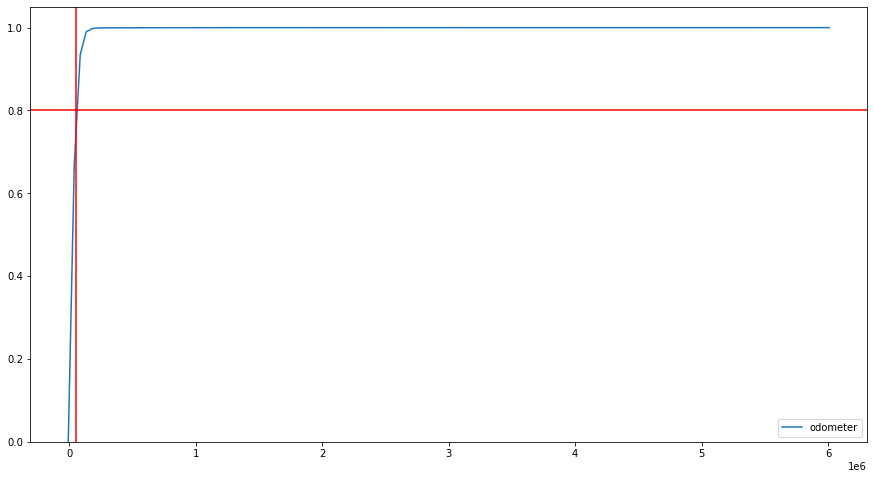

In [68]:
plt.figure(figsize=(15,8))
sns.kdeplot(X_train_joined.odometer.sort_values(),cumulative=True)
plt.axhline(.8,c='r')
plt.axvline(50000,c='r')
plt.show()

### Here we got a idea that around 80% of the cars driven less than 50000 

In [69]:
X_train_joined.head(1)

,cylinders,odometer,lat,long,age,region,manufacturer,model,condition,fuel,transmission,VIN,drive,type,paint_color,description,state,posting_date
56694,6.0,58402.0,38.5495,-90.3811,4.0,"st louis, MO",chrysler,300 s,excellent,gas,automatic,2C3CCABG6HH553736,rwd,sedan,black,2017 CHRYSLER 300 S You will not find a cleane...,il,2020-12-02T15:00:00-0600


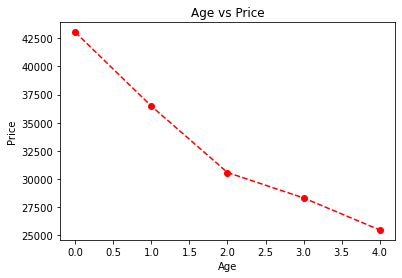

In [70]:
plt.plot(pd.concat([X_train_joined,y_train],axis=1).groupby(['age']).mean()['price'],'--or')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs Price')
plt.show()

In [88]:
# the above trend shows that as the AGE of car increases PRICE of the car decrease.

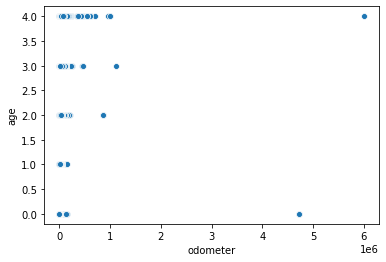

In [71]:
sns.scatterplot(pd.concat([X_train_joined,y_train],axis=1)['odometer'],pd.concat([X_train_joined,y_train],axis=1)['age'])

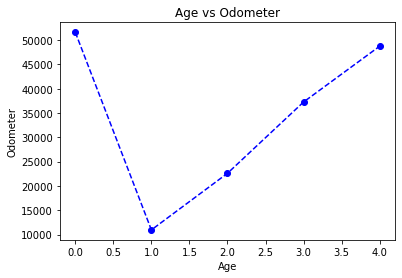

In [72]:
plt.plot(pd.concat([X_train_joined,y_train],axis=1).groupby(['age']).mean()['odometer'],'--ob')  
plt.xlabel('Age')
plt.ylabel('Odometer')
plt.title('Age vs Odometer')
plt.show()

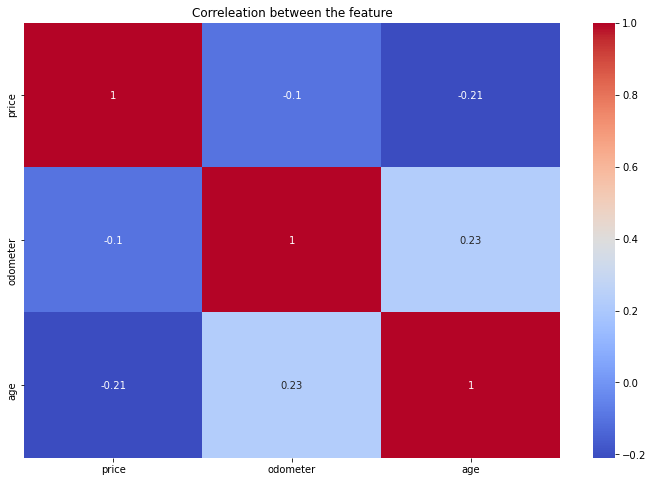

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.concat([X_train_joined,y_train],axis=1).sort_values(by='price')[['price','odometer','age']].corr(),annot=True,cmap='coolwarm')
plt.title('Correleation between the feature')
plt.show()

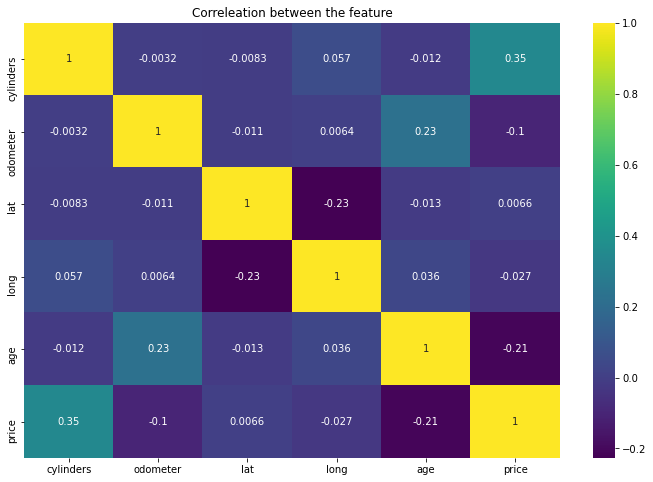

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.concat([X_train_joined,y_train],axis=1).corr(),annot=True,cmap='viridis')
plt.title('Correleation between the feature')
plt.show()

#from the above correlation matrix we came to know about the following insights :
1) : price and age of the car are negatively correlated means as the age of car increases price of the car decrease.
2) : odometre and price are also negatively correlated means according to distance travelled of the car its price also increase.
3) : age and odometer are positively correlated means distance travelled of the car increase as the age of car increased

# Getting the idea of the distribution of the  data of the Categorical Feature

In [77]:
X_train_joined.head(2)

,cylinders,odometer,lat,long,age,region,manufacturer,model,condition,fuel,transmission,VIN,drive,type,paint_color,description,state,posting_date
56694,6.0,58402.0,38.549500,-90.38110,4.0,"st louis, MO",chrysler,300 s,excellent,gas,automatic,2C3CCABG6HH553736,rwd,sedan,black,2017 CHRYSLER 300 S You will not find a cleane...,il,2020-12-02T15:00:00-0600
74859,4.0,73920.0,46.574457,-120.49054,3.0,yakima,chevrolet,malibu,good,gas,automatic,1G1ZD5ST9JF198066,fwd,sedan,white,2018 Chevrolet Chevy Malibu LT Sedan 4D Of...,wa,2020-11-20T10:38:55-0800


### Region

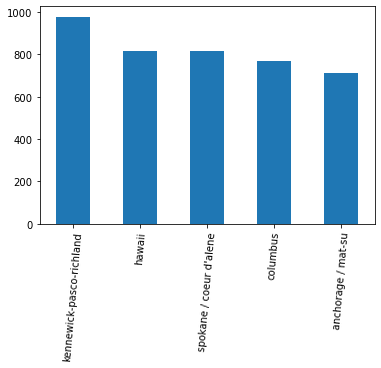

In [78]:
X_train_joined['region'].value_counts()[:5].plot(kind='bar')
plt.xticks(rotation=85)
plt.show()

### Manufacturer

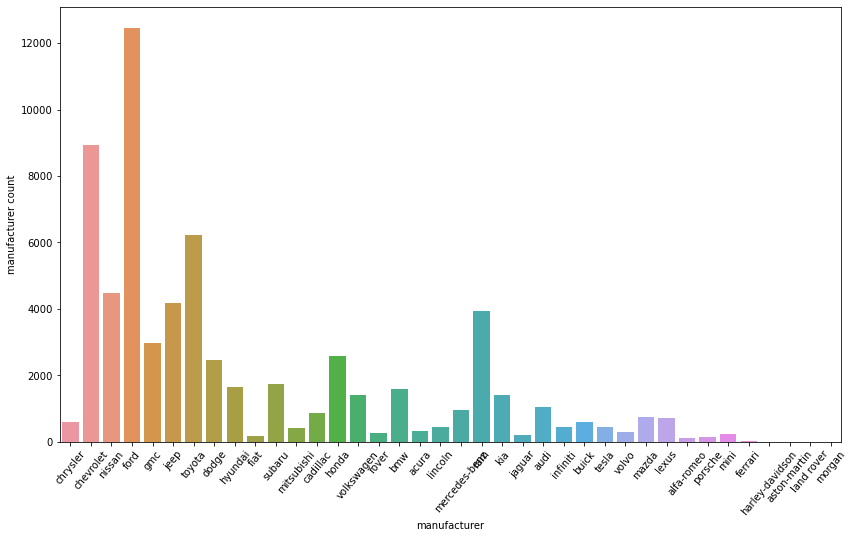

In [79]:
plt.subplots(figsize=(14,8))
sns.countplot(X_train_joined['manufacturer'])
plt.xticks(rotation=50)
plt.xlabel('manufacturer')
plt.ylabel('manufacturer count')
plt.show()

In [ ]:
# from the above graph The manufacture which produce the max no. of cars is ford

### Condition

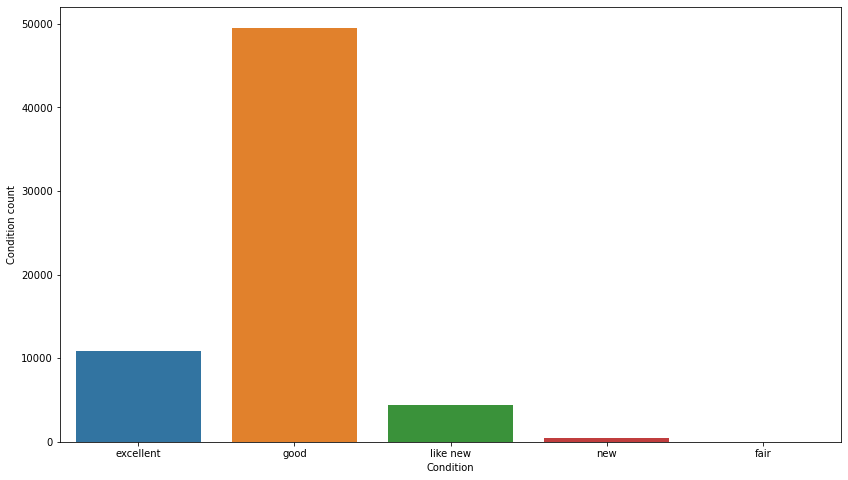

In [80]:
plt.subplots(figsize=(14,8))
sns.countplot(X_train_joined['condition'])
plt.xlabel('Condition')
plt.ylabel('Condition count')
plt.show()

In [ ]:
# from the above graph we found that most of the cars in good condition

### Fuel

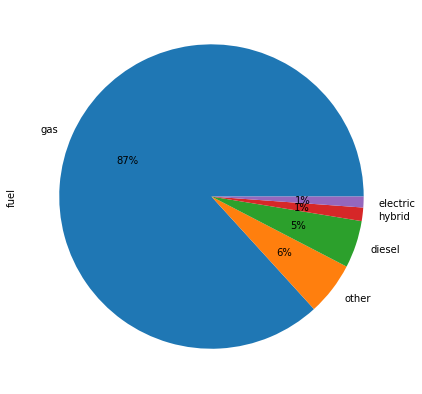

In [81]:
X_train_joined['fuel'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(7,7))
plt.show()

In [ ]:
# as we can see from the above graph Most of the cars runs on petrol.

### Type

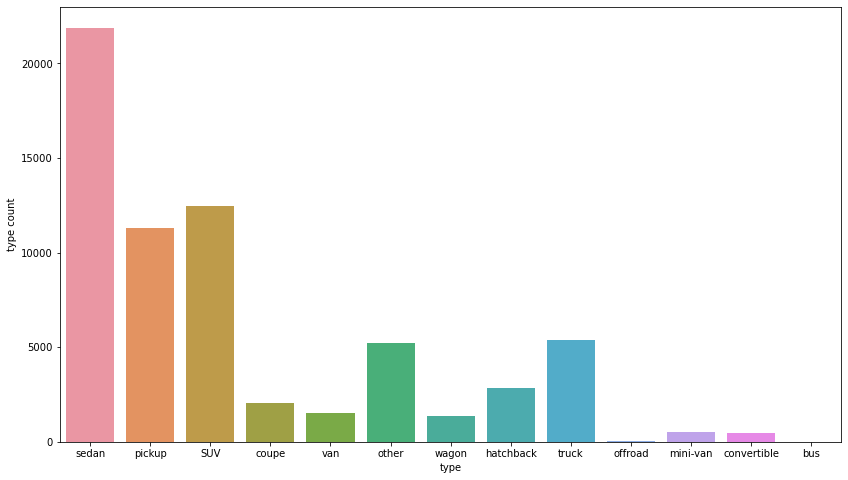

In [82]:
plt.subplots(figsize=(14,8))
sns.countplot(X_train_joined['type'])
plt.xlabel('type')
plt.ylabel('type count')
plt.show()

In [ ]:
# from the above we have Max. type of vehicle are sedan

### Model

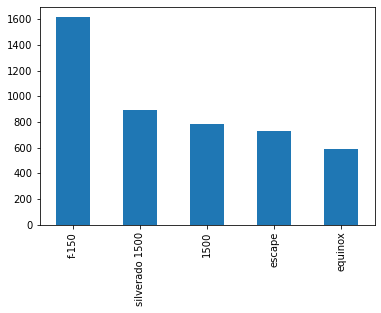

In [83]:

X_train_joined['model'].value_counts()[:5].plot(kind='bar')
plt.show()

### Transmission

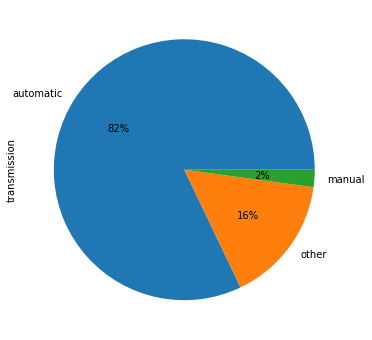

In [84]:
X_train_joined['transmission'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6))
plt.show()

In [ ]:
#it's clear from the above graph we have mx car i.e 82% cars are automatic 

### Drive

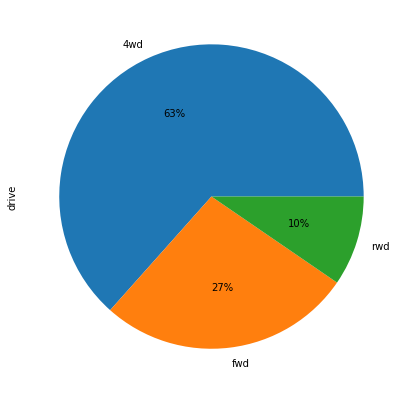

In [85]:
X_train_joined['drive'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(7,7))
plt.show()

In [ ]:
# as we can see from the above graph that Max. type of drive transmission is 4 wheel drive (4wd)

# Insights 

In [86]:
print('* The manufacture which produce the max no. of cars =>> ',X_train_joined['manufacturer'].value_counts().idxmax())
print('* Highest model =>> ',X_train_joined['model'].value_counts().idxmax())
print('* Fuel on which max car run =>> ',X_train_joined['fuel'].value_counts().idxmax())
print('* Max. type of vehicle  =>> ',X_train_joined['type'].value_counts().idxmax())
print('* Max. type of Region  =>> ',X_train_joined['region'].value_counts().idxmax())
print('* Max. type of manufacturer  =>> ',X_train_joined['manufacturer'].value_counts().idxmax())
print('* Max. type of condition  =>> ',X_train_joined['condition'].value_counts().idxmax())
print('* Max. type of Transmission =>> ',X_train_joined['transmission'].value_counts().idxmax())
print('* Max. type of drive  =>> ',X_train_joined['drive'].value_counts().idxmax())

* The manufacture which produce the max no. of cars =>>  ford
* Highest model =>>  f-150
* Fuel on which max car run =>>  gas
* Max. type of vehicle  =>>  sedan
* Max. type of Region  =>>  kennewick-pasco-richland
* Max. type of manufacturer  =>>  ford
* Max. type of condition  =>>  good
* Max. type of Transmission =>>  automatic
* Max. type of drive  =>>  4wd


# Bivariate

In [87]:
X_train_joined.select_dtypes(exclude=np.number).columns

Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'transmission',
       'VIN', 'drive', 'type', 'paint_color', 'description', 'state',
       'posting_date'],
      dtype='object')

In [ ]:
X_train_joined.select_dtypes(exclude=np.number).head(2)

In [ ]:
pd.crosstab(X_test_joined['type'],X_test_joined['condition']).plot(kind='bar',figsize=(15,7))
plt.show()

In [ ]:
pd.crosstab(X_test_joined['type'],X_test_joined['fuel']).plot(kind='bar',figsize=(15,7))
plt.show()

In [ ]:
sns.pairplot(pd.concat([X_train_joined,y_train],axis=1),diag_kind='kde',hue='type')
plt.show()